In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log10

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 5)

# Bruteforce

In [22]:
df = pd.read_csv("bruteforce/bruteforce.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

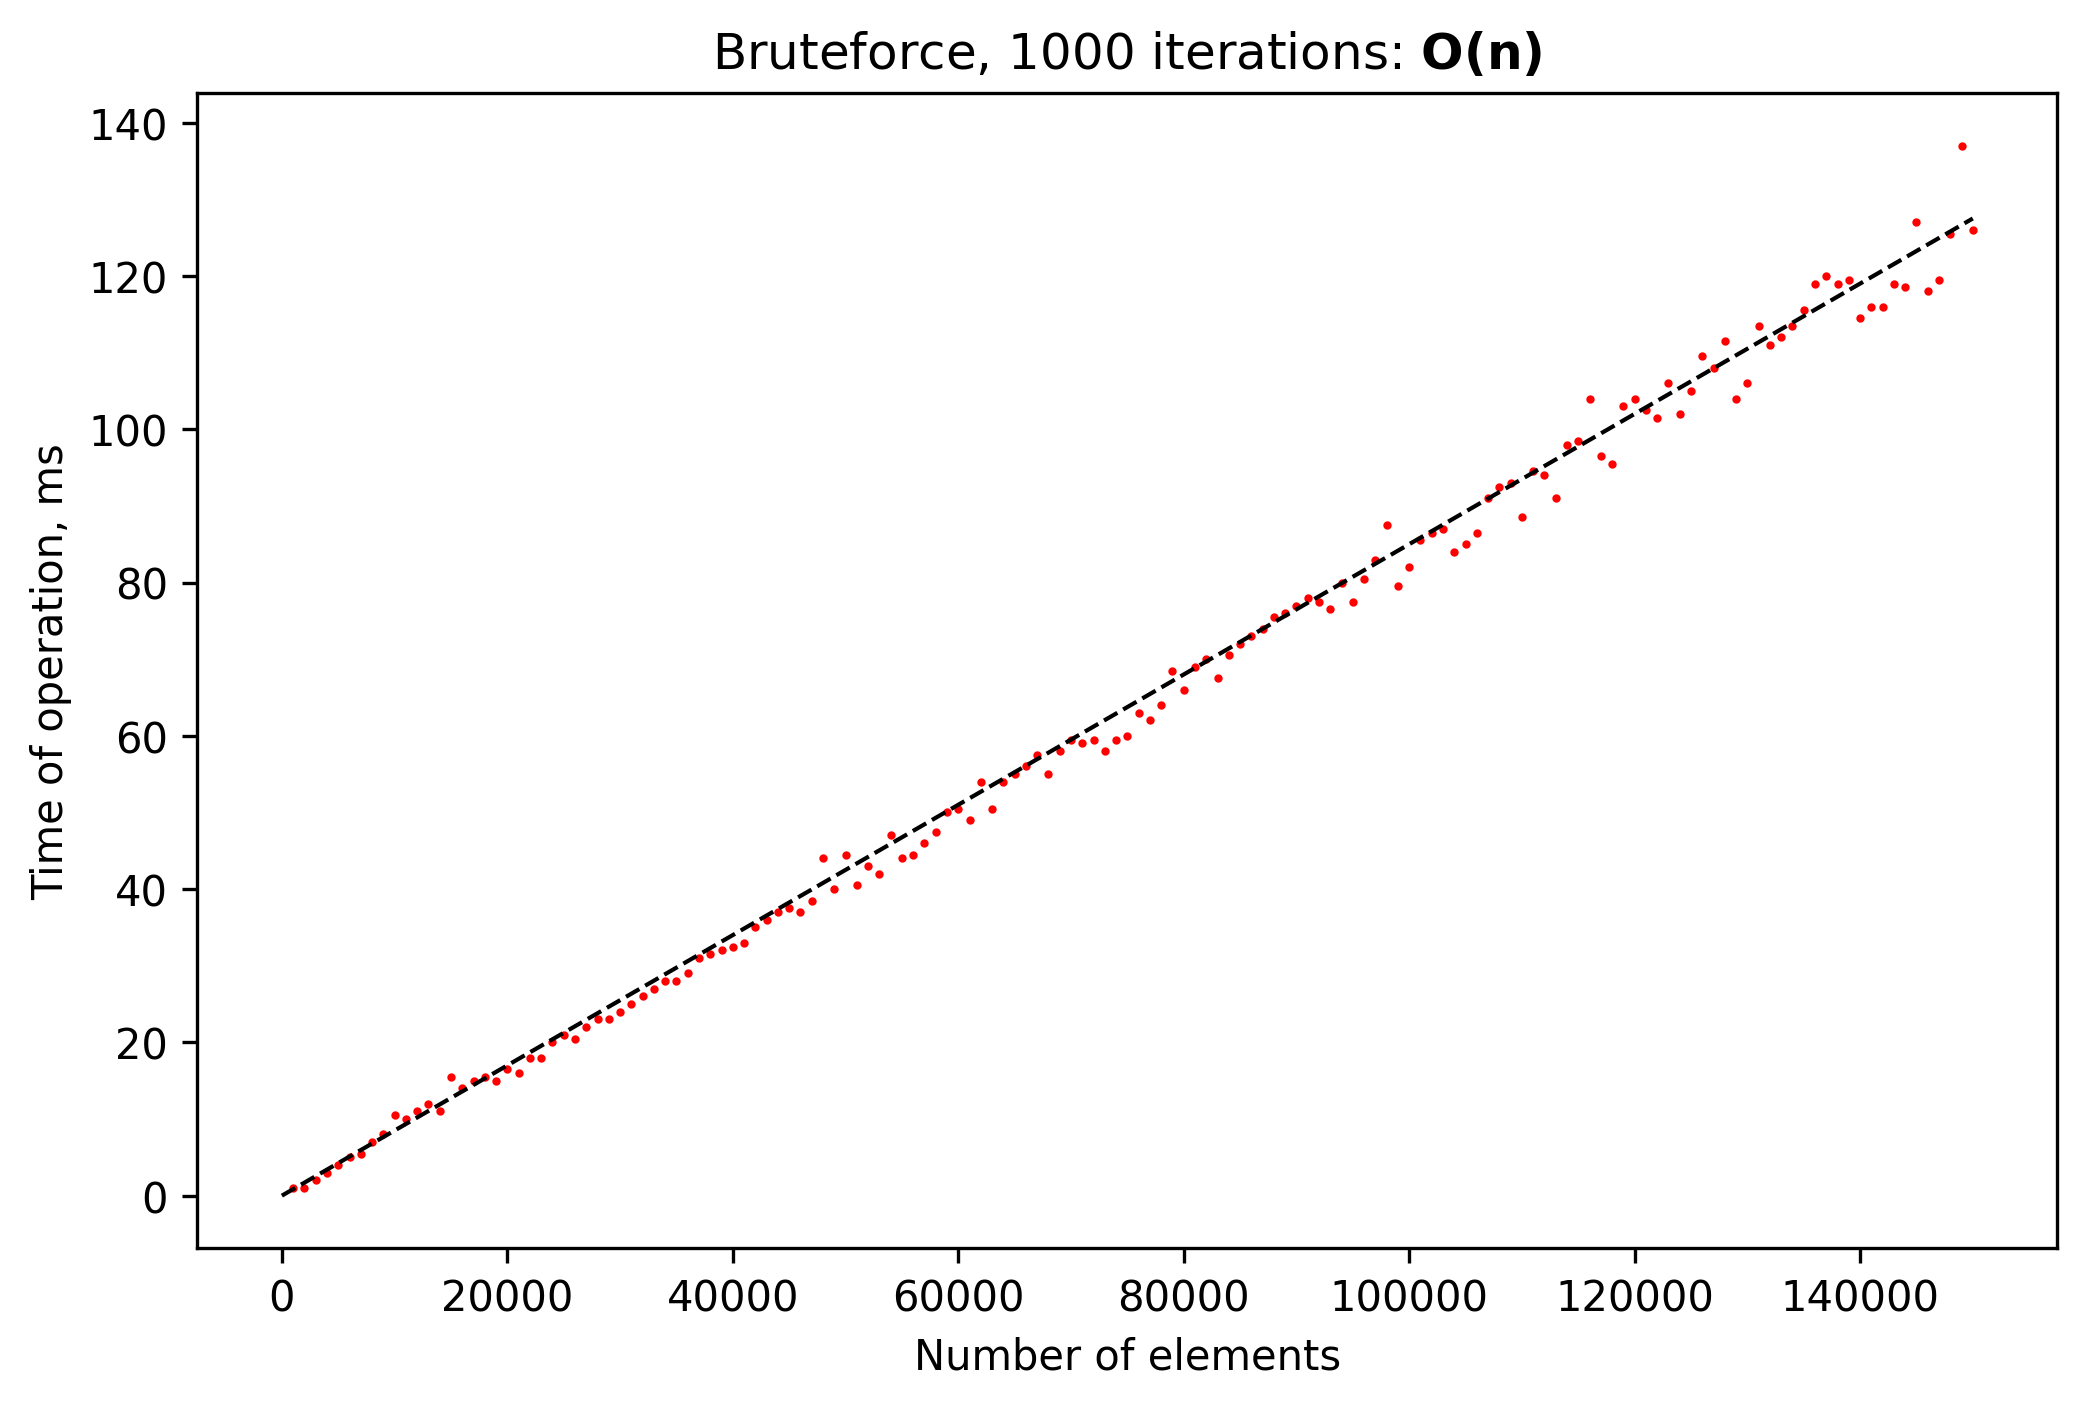

In [23]:

ls = np.linspace(0, 150000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title('Bruteforce, 1000 iterations: $\mathbf{O(n)}$')
k=85e-5
plt.plot(ls, k*ls, '--k', lw=1)

# Binary search

In [55]:
df = pd.read_csv("bisearch/bisearch.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:100].median(), axis=1)
df

,size,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time92,time93,time94,time95,time96,time97,time98,time99,time100,time
0,1,1113,1115,1115,1110,1112,1112,1099,1118,1124,...,1087,1087,1099,1112,1110,1111,1170,1117,1110,1083.0
1,2,2393,2393,2369,2285,2451,2290,2313,2179,2171,...,2487,2390,2406,2379,2488,2591,2323,2424,2348,2430.0
2,3,2612,2351,2385,2333,2496,2383,2449,2463,2521,...,2509,2560,2500,2401,2506,2462,2425,2420,2422,2466.0
3,4,3271,3220,3288,3188,3002,3226,3175,3181,3223,...,3224,3139,2862,3186,3071,2920,2846,3191,3223,3168.0
4,5,3158,2965,2907,3134,3061,2956,3399,3257,2930,...,3024,2889,3072,3016,2883,3101,2855,3221,3243,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,454823,23834,24503,21176,21133,23411,24606,24496,24493,23044,...,23398,23497,23497,23630,23786,21344,21048,20942,24068,23422.0
65,545788,24982,22776,25799,26264,26006,24978,25975,26176,22048,...,25207,26067,26680,26635,25968,22492,22224,22269,23219,24519.0
66,654946,25256,26014,24098,25920,28881,26090,25851,23816,23846,...,27932,22574,25638,21935,22010,22353,23745,24053,24523,24633.0
67,785936,22415,22778,24865,24911,25029,25061,25206,24454,22560,...,26907,22427,23505,24728,25548,22567,25772,26469,22815,24995.0


In [56]:
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)

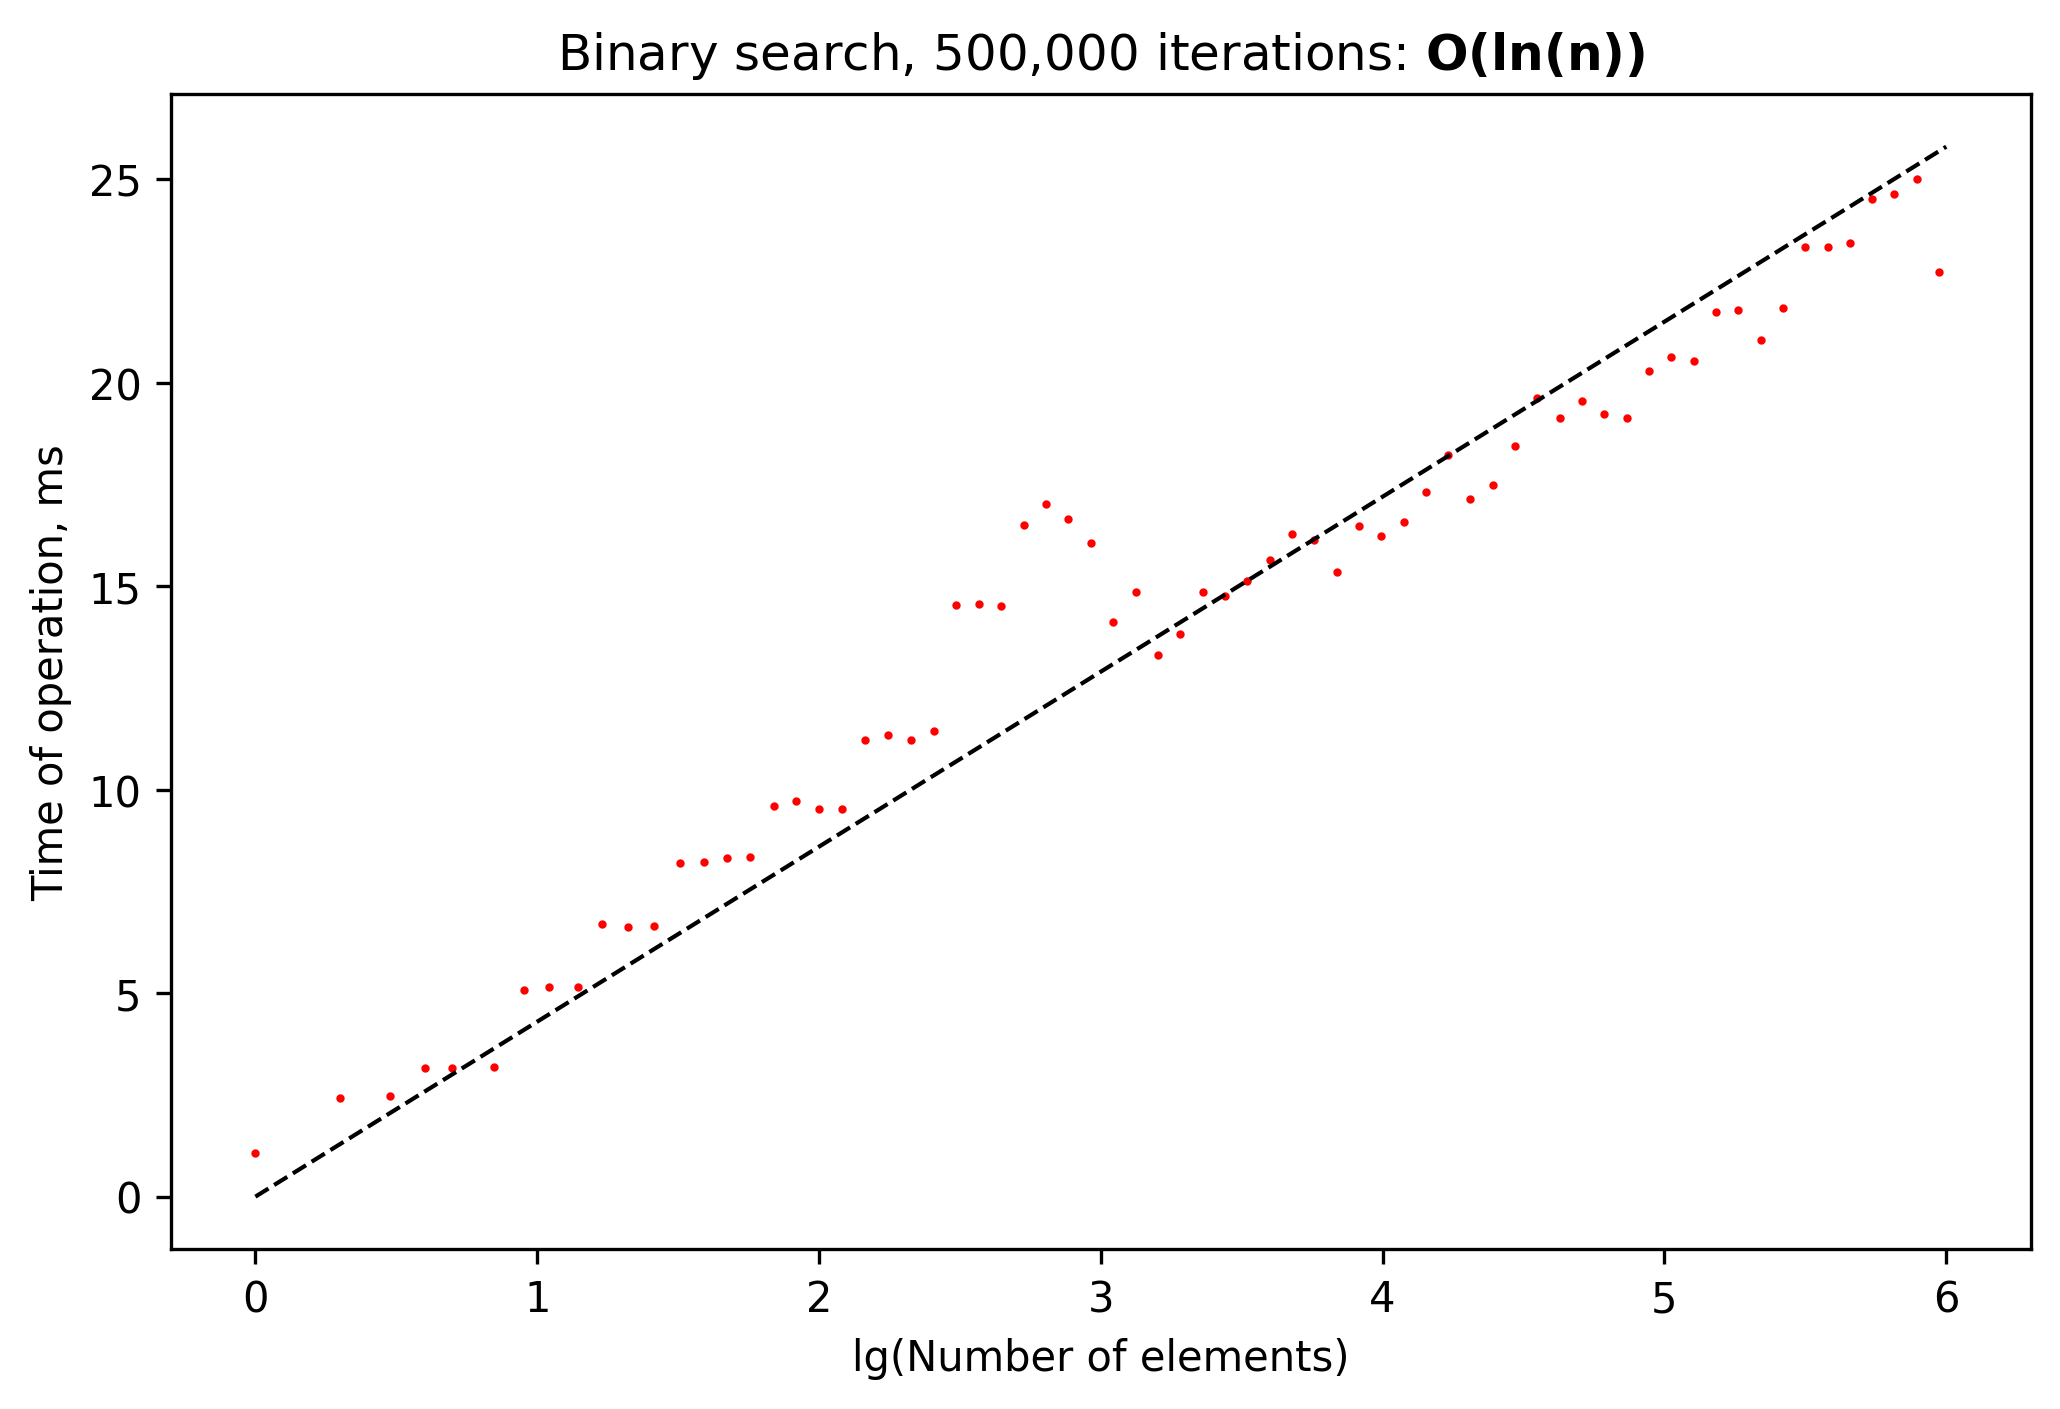

In [58]:
ls = np.linspace(0, 6, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['lnsize'], df['time']/1000, 'or', ms=1)
plt.title("Binary search, 500,000 iterations: $\mathbf{O(ln(n))}$")
k=4.3
plt.plot(ls, k*ls, '--k', lw=1)

# Sum of two

In [157]:
df = pd.read_csv("sumtwo/sumtwo.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

In [158]:
df= df[df.time!=0.0]
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)
df['lntime'] = df.apply(lambda x: log10(x['time']), axis=1)

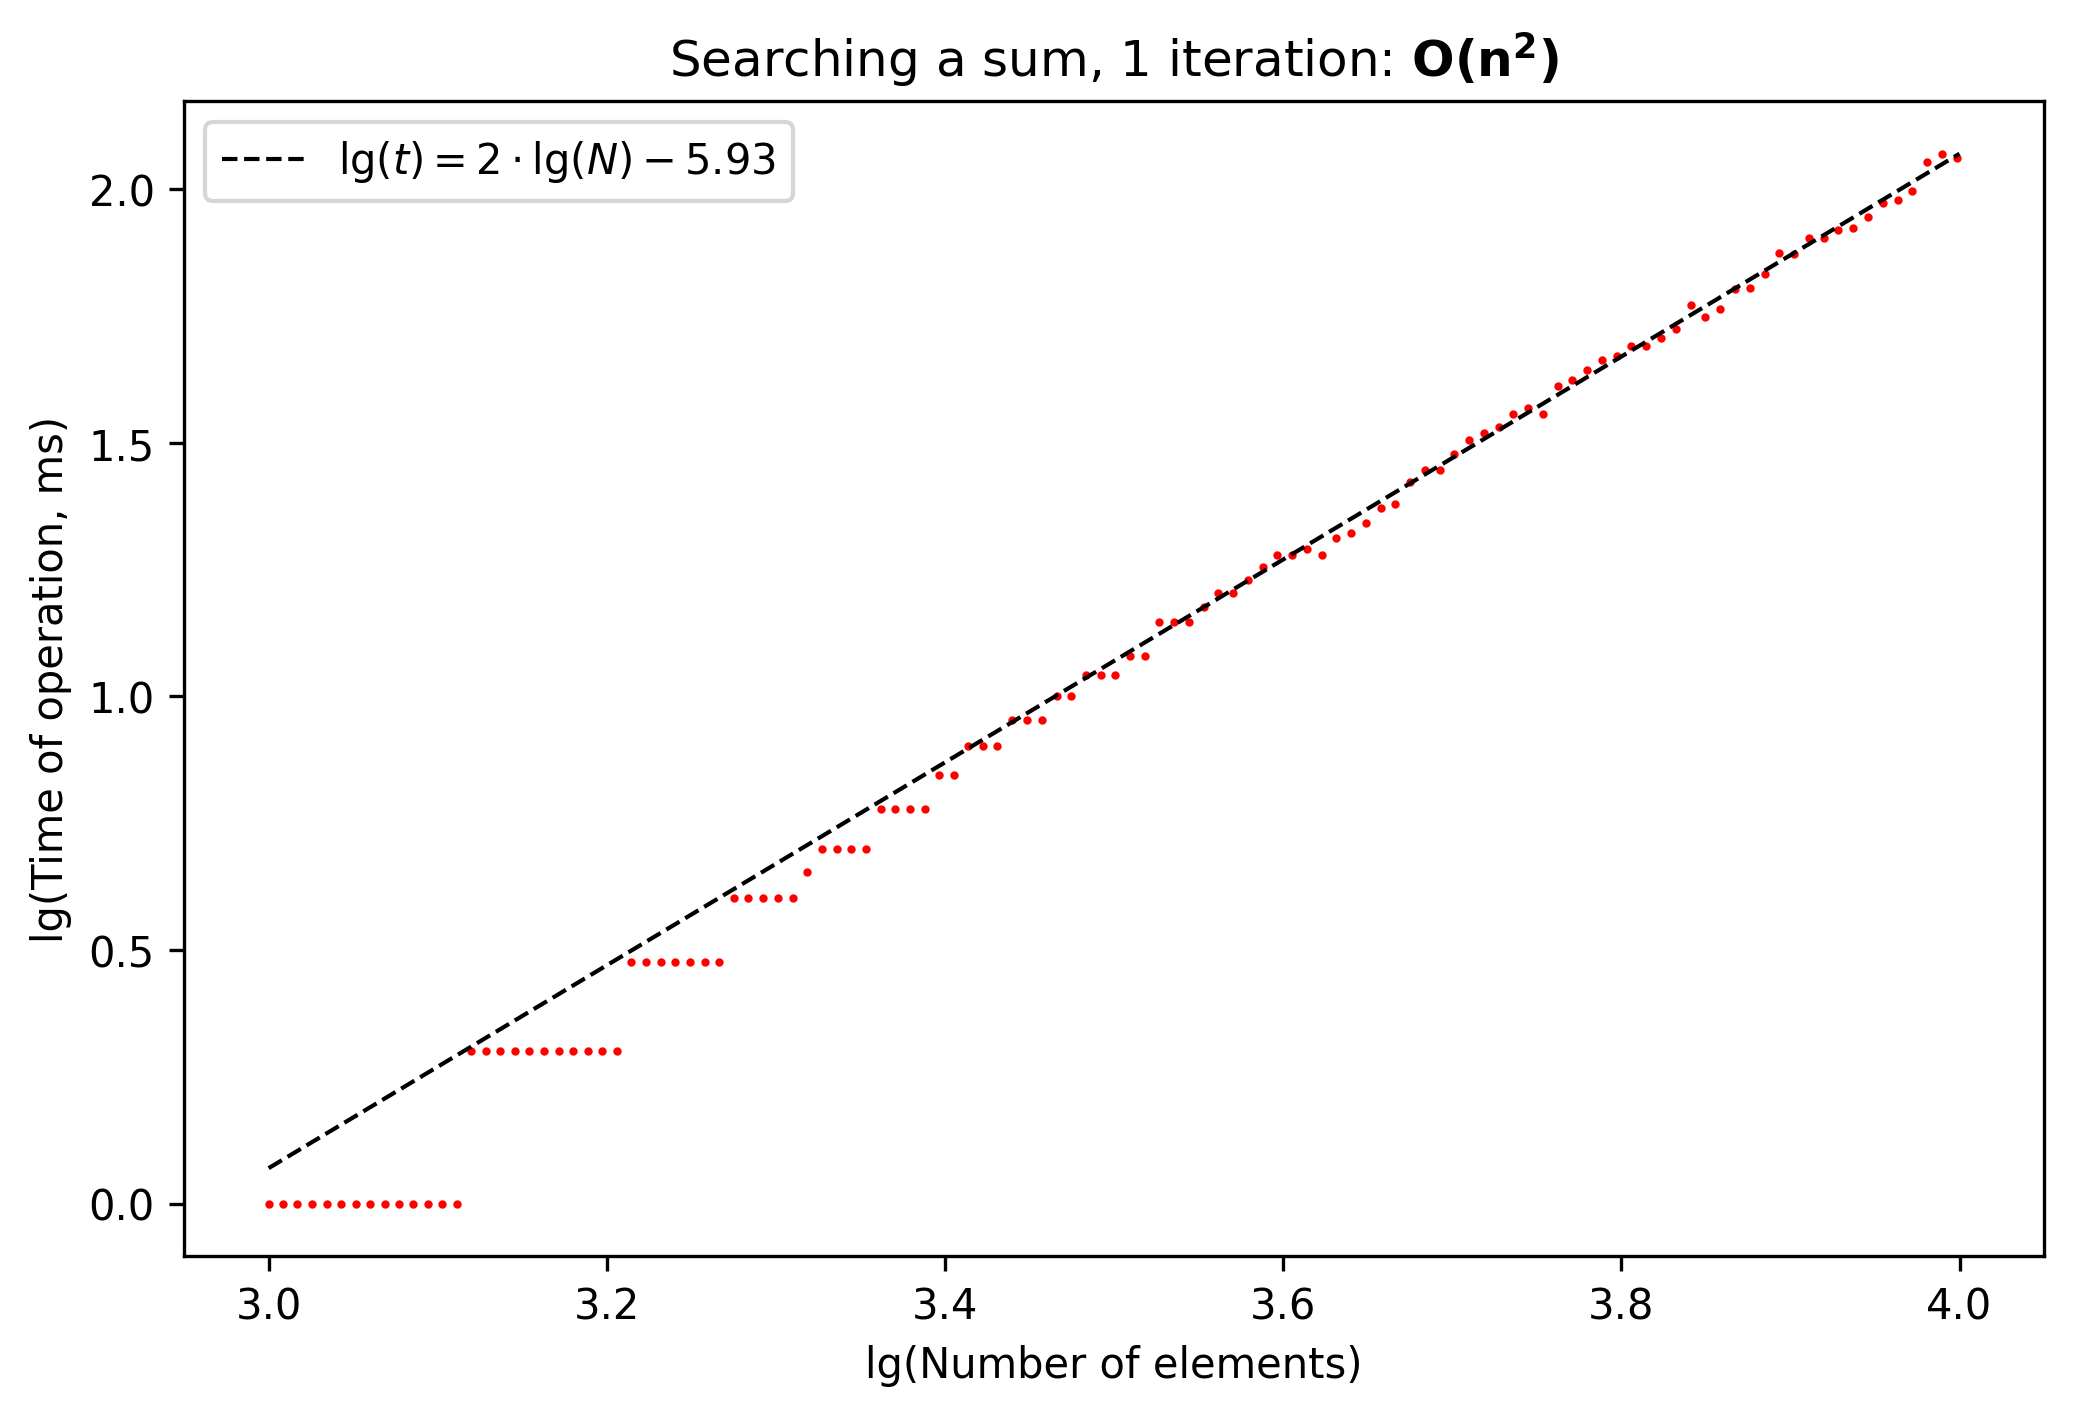

In [159]:
ls = np.linspace(3, 4, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'lg(Time of operation, ms)')
plt.plot(df['lnsize'], df['lntime'], 'or', ms=1)
plt.title("Searching a sum, 1 iteration: $\mathbf{O(n^2)}$")
k=2
b=-5.93
plt.plot(ls, k*ls+b, '--k', lw=1, label = r'$\lg(t) = 2\cdot \lg(N) - 5.93$')
plt.legend()

# Sum of two [SORTED]

In [165]:
df = pd.read_csv("sumtwo-sorted/sumtwo-sorted.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

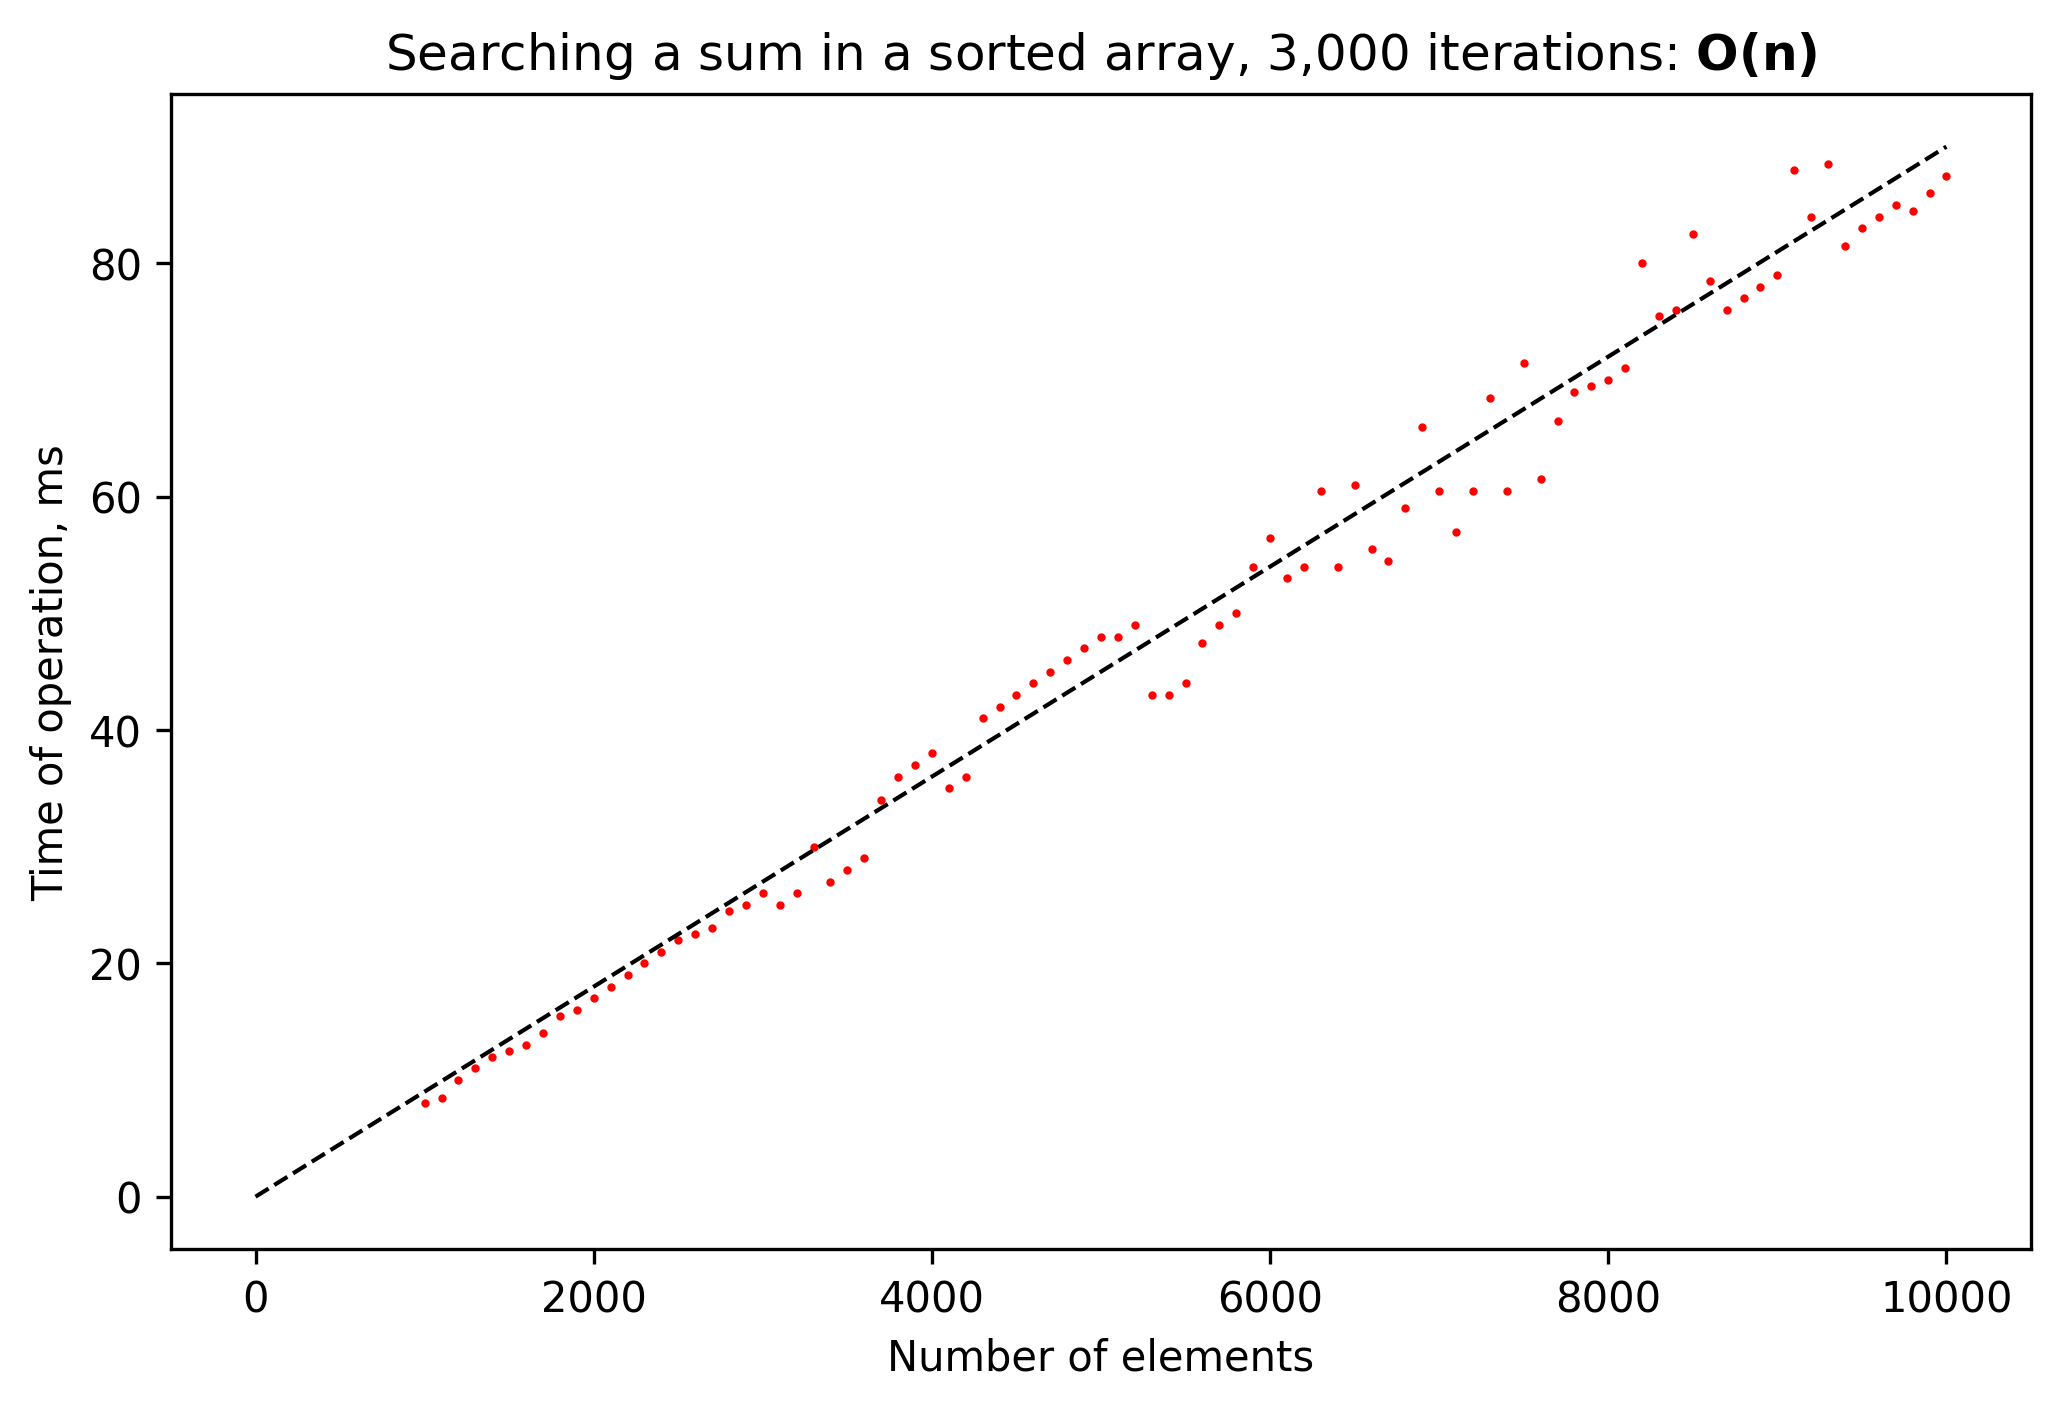

In [172]:
ls = np.linspace(0, 10000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title("Searching a sum in a sorted array, 3,000 iterations: $\mathbf{O(n)}$")
k=9.0e-3
plt.plot(ls, k*ls, '--k', lw=1)